# Heart Disease Prediction Using Machine Learning Algorithms

###  Importing the Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pyplot import figure

###  Importing the Dataset

In [2]:
data=pd.read_csv("heart.csv")

###  Checking out the Data

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

###  EDA

- Checking for null/missing values

In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:>

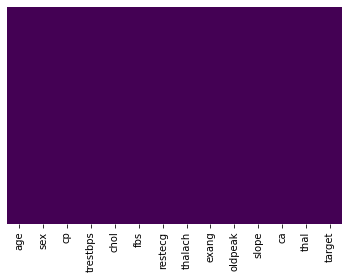

In [9]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

    -This means no null value is there in any of the columns

- Checking for duplicate values

In [10]:
data_dup=data.duplicated().any()

In [11]:
data_dup

True

    -It means our dataset contains duplicated rows. Let's drop them.

In [12]:
data = data.drop_duplicates()

In [13]:
data_dup=data.duplicated().any()
data_dup

False

    -Duplicates removed !

In [14]:
data.shape

(302, 14)

In [15]:
data = data.rename(columns={'cp':'chest_pain','trestbps':'blood_pressure','chol':'cholestrol','ca':'vessels','fbs':'blood_sugar'})

In [16]:
data

,age,sex,chest_pain,blood_pressure,cholestrol,blood_sugar,restecg,thalach,exang,oldpeak,slope,vessels,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


<AxesSubplot:>

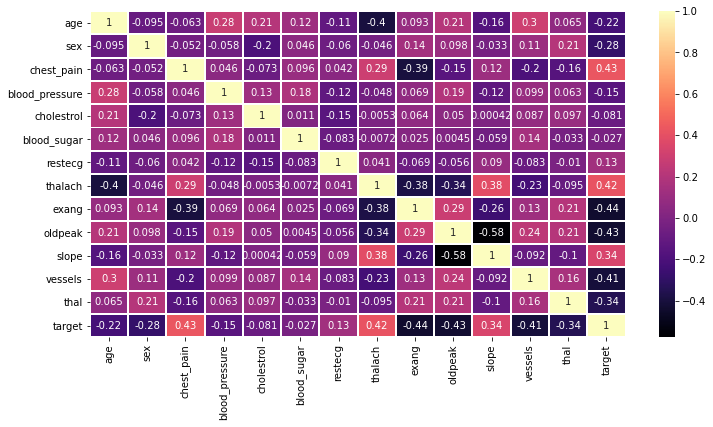

In [17]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(),cmap='magma',annot=True,linewidths=1)

###  Data Visualization

    -Preparing Data for better visualization

In [18]:
heart_disease = data.copy()
heart_disease['target'] = heart_disease['target'].replace({1:'disease',0:'no disease'})
heart_disease['sex'] = heart_disease['sex'].replace({1:'Male',0:'Female'})
heart_disease['chest_pain'] = heart_disease['chest_pain'].replace({0: "typical_angina", 
                                                                    1: "atypical_angina", 
                                                                    2:"non-anginal pain",
                                                                    3: "asymtomatic"})
heart_disease['blood_sugar'] = heart_disease['blood_sugar'].replace({1:True,0:False})
heart_disease['exang'] = heart_disease['exang'].replace({1:'Yes',0:'No'})
heart_disease['thal'] = heart_disease['thal'].replace({1:'fixed_defect',2:"reversable_defect",3:"normal"})
heart_disease['slope'] = heart_disease['slope'].replace({0:'unsloping',1:'flat',2:'downsloping'})

In [19]:
sns.set_style('whitegrid')

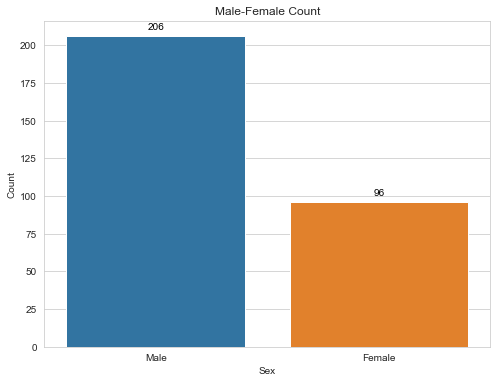

In [20]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='sex', data=heart_disease)

# Annotating bars with values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Male-Female Count')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

- There are more than 2x males than females in the dataset

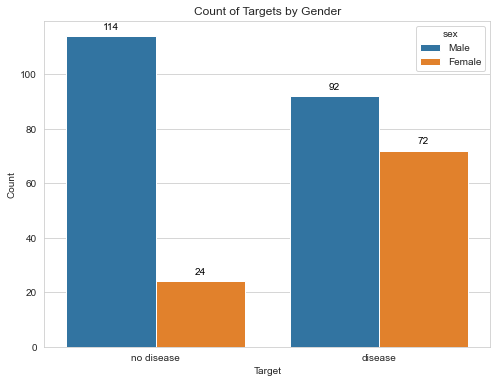

In [21]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='target', hue='sex', data=heart_disease)

# Annotating bars with values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Count of Targets by Gender')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

- Among the people who have heart disease, more are male
- Also, among the people who don't have heart disease most of them are male

<AxesSubplot:xlabel='age'>

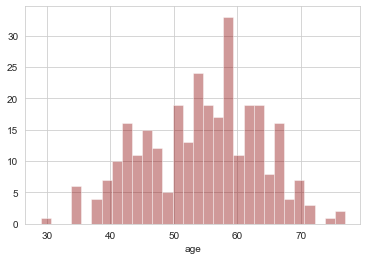

In [22]:
sns.distplot(heart_disease['age'],kde=False,color='darkred',bins=30)

- Most of the people in the dataset are above 50 Years of age

In [23]:
data_having_disease = heart_disease[heart_disease['target']=='disease']

    - Making a separate dataframe of people having heart disease 

In [24]:
data_having_disease

,age,sex,chest_pain,blood_pressure,cholestrol,blood_sugar,restecg,thalach,exang,oldpeak,slope,vessels,thal,target
5,58,Female,typical_angina,100,248,False,0,122,No,1.0,flat,0,reversable_defect,disease
10,71,Female,typical_angina,112,149,False,1,125,No,1.6,flat,0,reversable_defect,disease
12,34,Female,atypical_angina,118,210,False,1,192,No,0.7,downsloping,0,reversable_defect,disease
16,51,Female,non-anginal pain,140,308,False,0,142,No,1.5,downsloping,1,reversable_defect,disease
18,50,Female,atypical_angina,120,244,False,1,162,No,1.1,downsloping,0,reversable_defect,disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,55,Female,atypical_angina,135,250,False,0,161,No,1.4,flat,0,reversable_defect,disease
708,60,Female,non-anginal pain,120,178,True,1,96,No,0.0,downsloping,0,reversable_defect,disease
719,52,Male,typical_angina,108,233,True,1,147,No,0.1,downsloping,3,normal,disease
723,68,Female,non-anginal pain,120,211,False,0,115,No,1.5,flat,0,reversable_defect,disease


In [25]:
data_having_disease['Age Group'] = pd.cut(
    data_having_disease['age'], 
    [0, 40, 60, 90], 
    labels=['0-40 years', '41-60 years', '61+ years']
)

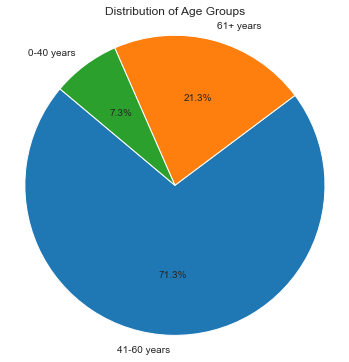

In [26]:
age_group_counts = data_having_disease['Age Group'].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Age Groups')
plt.axis('equal')  
plt.show()

- 71.3% of people having heart disease belong to 41-60 Years group.

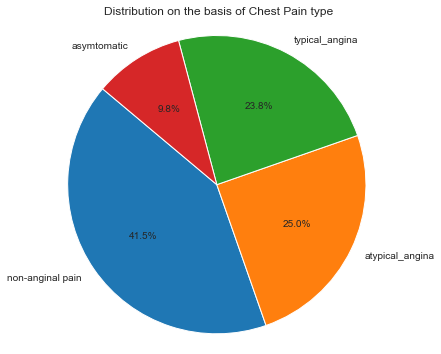

In [27]:
chest_pain_types = data_having_disease['chest_pain'].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(chest_pain_types, labels=chest_pain_types.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution on the basis of Chest Pain type')
plt.axis('equal')  
plt.show()

- 41.5% of people having heart disease were having 'non-anginal chest pain'
- It means type of chest-pain is very important for detection of heart disease

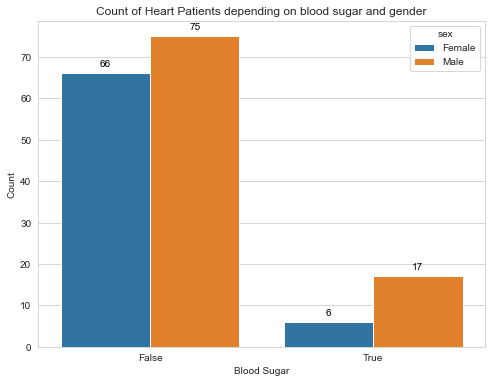

In [28]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='blood_sugar', hue='sex', data=data_having_disease)

# Annotating bars with values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Count of Heart Patients depending on blood sugar and gender')
plt.xlabel('Blood Sugar')
plt.ylabel('Count')
plt.show()

- It means just not having blood-sugar doesn't prevent you from becoming a heart patient.

In [29]:
data_having_disease['Blood Pressure Range'] = pd.cut(
    data_having_disease['blood_pressure'], 
    [0, 120, 140, 200], 
    labels=['0-120 mm Hg', '121-140 mm Hg', '140+ mm Hg']
)

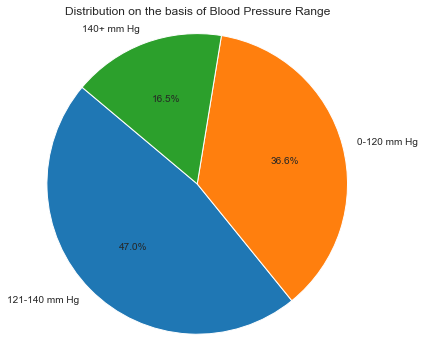

In [30]:
Blood_Pressure_Range = data_having_disease['Blood Pressure Range'].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(Blood_Pressure_Range, labels=Blood_Pressure_Range.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution on the basis of Blood Pressure Range')
plt.axis('equal')  
plt.show()

 - It shows that out of all heart patients, 47% patients blood pressure was in the range of 121-140 mm Hg

In [31]:
data_having_disease['Cholestrol Range'] = pd.cut(
    data_having_disease['cholestrol'], 
    [0, 200, 240, 550], 
    labels=['0-200 mg/dL', '201-240 mg/dL', '240+ mg/dL']
)

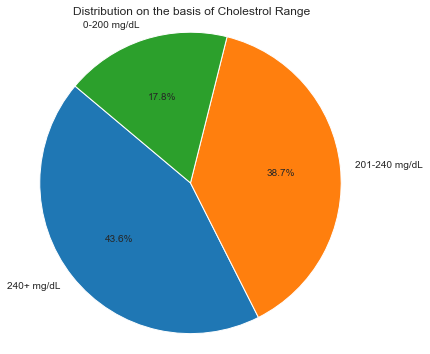

In [32]:
Cholestrol_Range = data_having_disease['Cholestrol Range'].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(Cholestrol_Range, labels=Cholestrol_Range.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution on the basis of Cholestrol Range')
plt.axis('equal')  
plt.show()

- Among heart patients, 43.6% of people were having high cholestrol level(240+ mg/dL)

### Findings

- So, the major findings of the visualizations done are:-
    - Among the people who have heart disease, more are male
    - 71.3% of people having heart disease belong to 41-60 Years group.
    - 41.5% of people having heart disease were having 'non-anginal chest pain'
    - Just not having blood-sugar doesn't prevent you from becoming a heart patient.
    - Out of all heart patients, 47% patients blood pressure was in the range of 121-140 mm Hg
    - Among heart patients, 43.6% of people were having high cholestrol level(240+ mg/dL)

###  Data Processing

- Splitting cateorical and numerical columns into two dataframes

In [33]:
cate_val=[]
cont_val=[]

for column in data.columns:
    if data[column].nunique()<10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [34]:
cate_val

['sex',
 'chest_pain',
 'blood_sugar',
 'restecg',
 'exang',
 'slope',
 'vessels',
 'thal',
 'target']

In [35]:
cont_val

['age', 'blood_pressure', 'cholestrol', 'thalach', 'oldpeak']

###  Encoding Categorical Data

In [36]:
cate_val.remove('sex')
cate_val.remove('target')

In [37]:
data=pd.get_dummies(data,columns=cate_val,drop_first=True)      #removing the dummy-variable trap(multicollinearity among the dummy variables)

In [38]:
data.head()

,age,sex,blood_pressure,cholestrol,thalach,oldpeak,target,chest_pain_1,chest_pain_2,chest_pain_3,...,exang_1,slope_1,slope_2,vessels_1,vessels_2,vessels_3,vessels_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


###  Feature Scaling

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
st = StandardScaler()
data[cont_val]=st.fit_transform(data[cont_val])

In [41]:
data.head()

,age,sex,blood_pressure,cholestrol,thalach,oldpeak,target,chest_pain_1,chest_pain_2,chest_pain_3,...,exang_1,slope_1,slope_2,vessels_1,vessels_2,vessels_3,vessels_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


###  Splitting the dataset into training set and testing set

In [42]:
X= data.drop('target',axis=1)

In [43]:
y= data['target']

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

###  Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
logist = LogisticRegression()

In [48]:
logist.fit(X_train, y_train)

LogisticRegression()

In [49]:
y_pred1= logist.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay,f1_score

In [51]:
print("Training Accuracy:- ",round(logist.score(X_train,y_train)*100,2),"%")

Training Accuracy:-  88.38 %


In [52]:
print("Testing Accuracy:- ",round(logist.score(X_test,y_test)*100,2),"%")

Testing Accuracy:-  78.69 %


In [53]:
print("CLASSIFICATION REPORT:- ","\n",classification_report(y_test,y_pred1))

CLASSIFICATION REPORT:-  
               precision    recall  f1-score   support

           0       0.83      0.75      0.79        32
           1       0.75      0.83      0.79        29

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [54]:
print("CONFUSION MATRIX:- ",'\n',confusion_matrix(y_test,y_pred1))

CONFUSION MATRIX:-  
 [[24  8]
 [ 5 24]]


<Figure size 1600x1000 with 0 Axes>

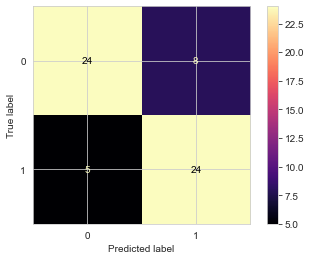

In [55]:
figure(figsize=(16, 10), dpi=100)
cm = confusion_matrix(y_test, y_pred1, labels=logist.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=logist.classes_)

disp.plot(cmap="magma")
plt.show();

###  SVC

In [56]:
from sklearn import svm

In [57]:
svm = svm.SVC()

In [58]:
svm.fit(X_train,y_train)

SVC()

In [59]:
y_pred2= svm.predict(X_test)

In [60]:
print("Training Accuracy:- ",round(svm.score(X_train,y_train)*100,2),"%")

Training Accuracy:-  91.29 %


In [61]:
print("Testing Accuracy:- ",round(svm.score(X_test,y_test)*100,2),"%")

Testing Accuracy:-  80.33 %


In [62]:
print("CONFUSION MATRIX:- ",'\n',confusion_matrix(y_test,y_pred2))

CONFUSION MATRIX:-  
 [[24  8]
 [ 4 25]]


In [63]:
print("CLASSIFICATION REPORT:- ","\n",classification_report(y_test,y_pred2))

CLASSIFICATION REPORT:-  
               precision    recall  f1-score   support

           0       0.86      0.75      0.80        32
           1       0.76      0.86      0.81        29

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



<Figure size 1600x1000 with 0 Axes>

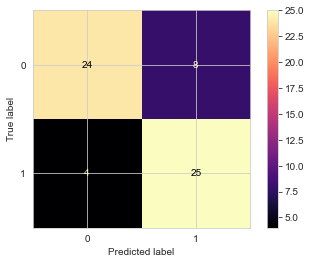

In [64]:
figure(figsize=(16, 10), dpi=100)
cm = confusion_matrix(y_test, y_pred2, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=svm.classes_)

disp.plot(cmap="magma")
plt.show();

###  KNeighbors Classifier

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
score=[]

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred= knn.predict(X_test)
    score.append(accuracy_score(y_test,pred))

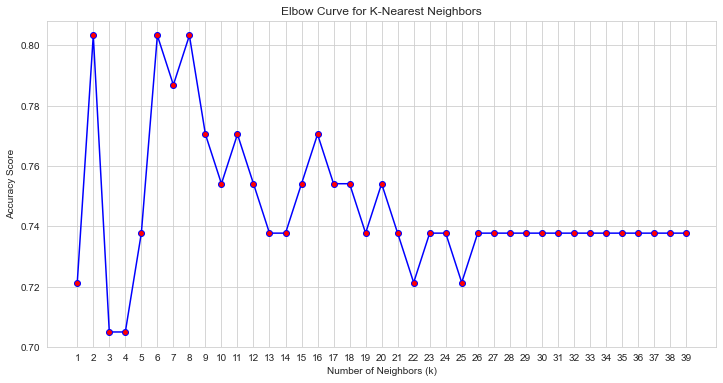

In [67]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), score, marker='o',color='blue',markerfacecolor='red')
plt.title('Elbow Curve for K-Nearest Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.xticks(range(1, 40))
plt.grid(True)
plt.show()

- From the elbow-curve we can say that, at k=2,6 and 8, the model gives best accuracy

In [68]:
knn= KNeighborsClassifier(n_neighbors=6)

In [69]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [70]:
y_pred3=knn.predict(X_test)

In [71]:
print("Training Accuracy:- ",round(knn.score(X_train,y_train)*100,2),"%")

Training Accuracy:-  84.23 %


In [72]:
print("Testing Accuracy:- ",round(knn.score(X_test,y_test)*100,2),"%")

Testing Accuracy:-  80.33 %


In [73]:
print("CLASSIFICATION REPORT:- ","\n",classification_report(y_test,y_pred3))

CLASSIFICATION REPORT:-  
               precision    recall  f1-score   support

           0       0.86      0.75      0.80        32
           1       0.76      0.86      0.81        29

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



In [74]:
print("CONFUSION MATRIX:- ",'\n',confusion_matrix(y_test,y_pred3))

CONFUSION MATRIX:-  
 [[24  8]
 [ 4 25]]


<Figure size 1600x1000 with 0 Axes>

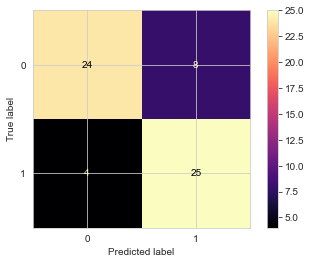

In [75]:
figure(figsize=(16, 10), dpi=100)
cm = confusion_matrix(y_test, y_pred3, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=knn.classes_)

disp.plot(cmap="magma")
plt.show();

## Non-Linear ML Algorithms

- For non-linear ML Algorithms we don't need to perform encoding and feature scaling

In [76]:
data=pd.read_csv('heart.csv')

In [77]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [78]:
data=data.drop_duplicates()

In [79]:
X = data.drop('target',axis=1)
y=data['target']

In [80]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

###  Decision Tree Classifier

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
tree = DecisionTreeClassifier()

In [83]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [84]:
y_pred4=tree.predict(X_test)

In [85]:
print("Training Accuracy:- ",round(tree.score(X_train,y_train)*100,2),"%")

Training Accuracy:-  100.0 %


In [86]:
print("Testing Accuracy:- ",round(tree.score(X_test,y_test)*100,2),"%")

Testing Accuracy:-  70.49 %


In [87]:
print("CLASSIFICATION REPORT:- ","\n",classification_report(y_test,y_pred4))

CLASSIFICATION REPORT:-  
               precision    recall  f1-score   support

           0       0.72      0.72      0.72        32
           1       0.69      0.69      0.69        29

    accuracy                           0.70        61
   macro avg       0.70      0.70      0.70        61
weighted avg       0.70      0.70      0.70        61



In [88]:
print("CONFUSION MATRIX:- ",'\n',confusion_matrix(y_test,y_pred4))

CONFUSION MATRIX:-  
 [[23  9]
 [ 9 20]]


<Figure size 1600x1000 with 0 Axes>

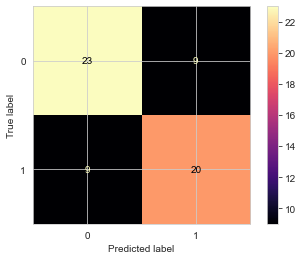

In [89]:
figure(figsize=(16, 10), dpi=100)
cm = confusion_matrix(y_test, y_pred4, labels=tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=tree.classes_)

disp.plot(cmap="magma")
plt.show();

###  Random Forest Classifier

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
forest=RandomForestClassifier()

In [92]:
forest.fit(X_train,y_train)

RandomForestClassifier()

In [93]:
y_pred5=forest.predict(X_test)

In [94]:
print("Training Accuracy:- ",round(forest.score(X_train,y_train)*100,2),"%")

Training Accuracy:-  100.0 %


In [95]:
print("Testing Accuracy:- ",round(forest.score(X_test,y_test)*100,2),"%")

Testing Accuracy:-  85.25 %


In [96]:
print("CLASSIFICATION REPORT:- ","\n",classification_report(y_test,y_pred5))

CLASSIFICATION REPORT:-  
               precision    recall  f1-score   support

           0       0.90      0.81      0.85        32
           1       0.81      0.90      0.85        29

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [97]:
print("CONFUSION MATRIX:- ",'\n',confusion_matrix(y_test,y_pred5))

CONFUSION MATRIX:-  
 [[26  6]
 [ 3 26]]


<Figure size 1600x1000 with 0 Axes>

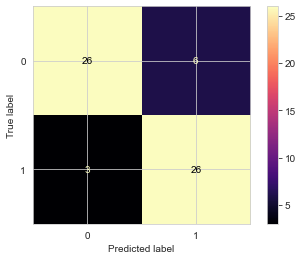

In [98]:
figure(figsize=(16, 10), dpi=100)
cm = confusion_matrix(y_test, y_pred5, labels=forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=forest.classes_)

disp.plot(cmap="magma")
plt.show();

###  Gradient Boosting Classifier

In [99]:
from sklearn.ensemble import GradientBoostingClassifier

In [100]:
gbc= GradientBoostingClassifier()

In [101]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [102]:
y_pred6=gbc.predict(X_test)

In [103]:
print("Training Accuracy:- ",round(gbc.score(X_train,y_train)*100,2),"%")

Training Accuracy:-  100.0 %


In [104]:
print("Testing Accuracy:- ",round(gbc.score(X_test,y_test)*100,2),"%")

Testing Accuracy:-  80.33 %


In [105]:
print("CLASSIFICATION REPORT:- ","\n",classification_report(y_test,y_pred6))

CLASSIFICATION REPORT:-  
               precision    recall  f1-score   support

           0       0.86      0.75      0.80        32
           1       0.76      0.86      0.81        29

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



In [106]:
print("CONFUSION MATRIX:- ",'\n',confusion_matrix(y_test,y_pred6))

CONFUSION MATRIX:-  
 [[24  8]
 [ 4 25]]


<Figure size 1600x1000 with 0 Axes>

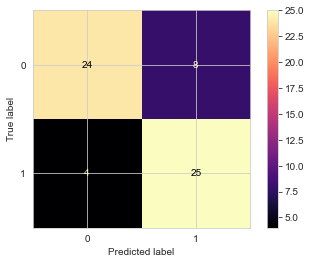

In [107]:
figure(figsize=(16, 10), dpi=100)
cm = confusion_matrix(y_test, y_pred6, labels=gbc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=gbc.classes_)

disp.plot(cmap="magma")
plt.show();

## Comparison of Models :

In [108]:
comparison_tab = pd.DataFrame({'Models':['LR', 'SVM', 'KNN', 'DT','RF', 'GB'],
                              'Accuracy Score':[accuracy_score(y_test,y_pred1),
                                                accuracy_score(y_test,y_pred2),
                                                accuracy_score(y_test,y_pred3),
                                               accuracy_score(y_test,y_pred4),
                                                accuracy_score(y_test,y_pred5),
                                                accuracy_score(y_test,y_pred6)],
                             'F1- Score':[f1_score(y_test,y_pred1),
                                           f1_score(y_test,y_pred2),
                                          f1_score(y_test,y_pred3),
                                          f1_score(y_test,y_pred4),
                                          f1_score(y_test,y_pred5),
                                          f1_score(y_test,y_pred6)]})

In [109]:
comparison_tab

,Models,Accuracy Score,F1- Score
0,LR,0.786885,0.786885
1,SVM,0.803279,0.806452
2,KNN,0.803279,0.806452
3,DT,0.704918,0.689655
4,RF,0.852459,0.852459
5,GB,0.803279,0.806452


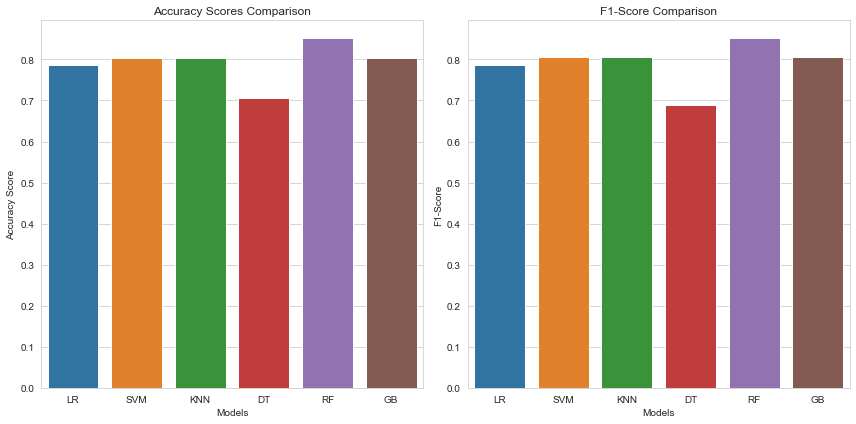

In [110]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(x=comparison_tab['Models'],y=comparison_tab['Accuracy Score'],ax=ax1)
ax1.set_title('Accuracy Scores Comparison')
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy Score')

sns.barplot(x=comparison_tab['Models'],y=comparison_tab['F1- Score'],ax=ax2)
ax2.set_title('F1-Score Comparison')
ax2.set_xlabel('Models')
ax2.set_ylabel('F1-Score')

plt.tight_layout()
plt.show()

- So, from the above barplots we can say that RandomForestClassifier is the best model for our data.

Note:- We have used train-test split just to evaluate our models. 
       But for production purpose we have to train our model on the entire data available to us.

- So, we will train our best model(RandomForest) on the entire dataset.

In [111]:
X = data.drop('target',axis=1)
y=data['target']

In [112]:
best_model=RandomForestClassifier()

In [113]:
best_model.fit(X,y)

RandomForestClassifier()

### Save Model Using Joblib

In [114]:
import joblib

In [115]:
joblib.dump(best_model,'model_joblib_heart')

['model_joblib_heart']